In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("text.csv")

In [3]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [6]:
df.label=df.label.map({0:"sadness",1:"joy",2:"love",3:"anger",4:"fear",5:" surprise"})

In [7]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,fear


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [9]:
import matplotlib.pyplot as plt

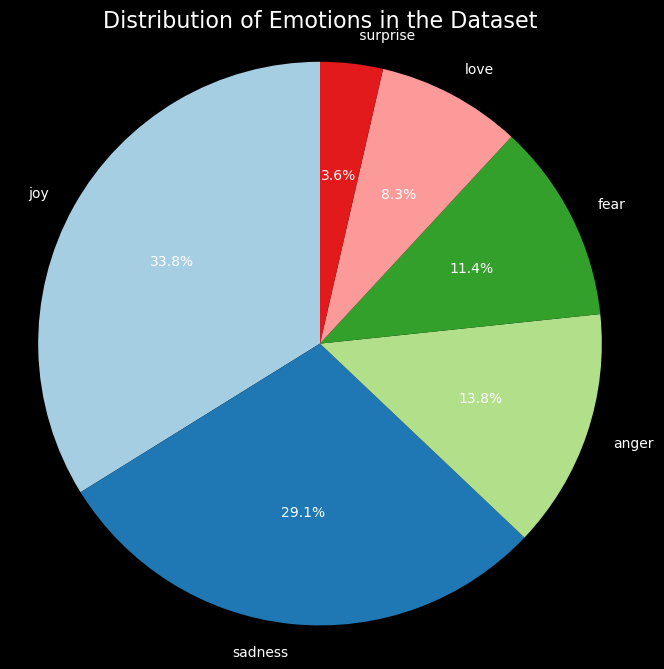

In [10]:
counts = df.label.value_counts()
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 8))  
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribution of Emotions in the Dataset", fontsize=16, color='white')
plt.axis('equal')  
plt.show()
plt.close()

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ENG.MOHMED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ENG.MOHMED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ENG.MOHMED\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
clean_texts = []
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
for text in df['text']:
    text = text.lower() 
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  
    clean_text = ' '.join(tokens) 
    clean_texts.append(clean_text)

In [14]:
df['text'] = clean_texts

In [15]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('label', axis=1)
Y = df['label']

rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

df_balanced = pd.concat([X_resampled, Y_resampled], axis=1)

df_sampled = df_balanced.sample(n=10000, random_state=42).reset_index(drop=True)

In [16]:
x=df_sampled["text"]
y=df_sampled["label"]

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=42)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [20]:
svc = SVC(kernel='linear')
log_reg = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier(n_estimators=100)
nb = MultinomialNB()

svc.fit(x_train_vec, y_train)
log_reg.fit(x_train_vec, y_train)
rf.fit(x_train_vec, y_train)
nb.fit(x_train_vec, y_train)

MultinomialNB()

In [21]:
test_sentences = [
    "A good movie",
    "Nothing seems to matter anymore.",
    "You got me a gift? I wasn’t expecting this!",
    "Walking down that dark alley made my heart race.",
    "This is so unfair, I’m furious!",
    "Every moment with you feels like a dream come true."
]
test_vec = vectorizer.transform(test_sentences)



In [22]:
svc_predictions = svc.predict(test_vec)
log_reg_predictions = log_reg.predict(test_vec)
rf_predictions = rf.predict(test_vec)
nb_predictions = nb.predict(test_vec)
print("SVC Predictions:", svc_predictions)
print("Logistic Regression Predictions:", log_reg_predictions)
print("Random Forest Predictions:", rf_predictions)
print("Naive Bayes Predictions:", nb_predictions)


SVC Predictions: ['joy' 'sadness' 'anger' 'joy' 'anger' 'joy']
Logistic Regression Predictions: ['joy' 'sadness' 'joy' 'joy' 'anger' 'joy']
Random Forest Predictions: ['anger' 'anger' 'anger' 'anger' 'anger' 'joy']
Naive Bayes Predictions: ['love' 'anger' ' surprise' 'fear' 'anger' 'fear']


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

models = {
    'SVC': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Naive Bayes': MultinomialNB()
}

results = {}

for model_name, model in models.items():
    model.fit(x_train_vec, y_train)
    y_pred = model.predict(x_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }



In [24]:
import seaborn as sns

Model: SVC
Accuracy: 0.8836363636363637
Precision (weighted): 0.8845480658538102
Recall (weighted): 0.8836363636363637
F1-Score (weighted): 0.882862419862166
Confusion Matrix:
[[533   1  16   4   1   2]
 [  7 491  24  10   7  22]
 [ 58  17 462   6   7   6]
 [ 10   8   7 424  46  18]
 [  3   3   3  10 532   4]
 [  9  29  17  16  13 474]]
Classification Report:
{' surprise': {'precision': 0.8596774193548387, 'recall': 0.9569120287253142, 'f1-score': 0.9056924384027187, 'support': 557.0}, 'anger': {'precision': 0.8943533697632058, 'recall': 0.875222816399287, 'f1-score': 0.8846846846846846, 'support': 561.0}, 'fear': {'precision': 0.8733459357277883, 'recall': 0.8309352517985612, 'f1-score': 0.8516129032258064, 'support': 556.0}, 'joy': {'precision': 0.902127659574468, 'recall': 0.8265107212475633, 'f1-score': 0.8626653102746694, 'support': 513.0}, 'love': {'precision': 0.8778877887788779, 'recall': 0.9585585585585585, 'f1-score': 0.9164513350559862, 'support': 555.0}, 'sadness': {'precis

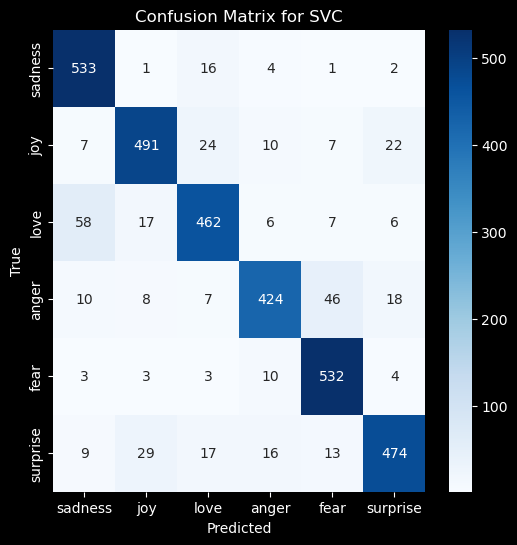

Model: Logistic Regression
Accuracy: 0.876969696969697
Precision (weighted): 0.8775228769343155
Recall (weighted): 0.876969696969697
F1-Score (weighted): 0.8763652140088152
Confusion Matrix:
[[526   1  20   5   2   3]
 [  7 488  26  17   3  20]
 [ 53   9 471  11   6   6]
 [ 11   7  10 428  41  16]
 [  3   3   2  19 525   3]
 [  9  34  21  25  13 456]]
Classification Report:
{' surprise': {'precision': 0.8637110016420362, 'recall': 0.9443447037701975, 'f1-score': 0.902229845626072, 'support': 557.0}, 'anger': {'precision': 0.9003690036900369, 'recall': 0.8698752228163993, 'f1-score': 0.8848594741613781, 'support': 561.0}, 'fear': {'precision': 0.8563636363636363, 'recall': 0.8471223021582733, 'f1-score': 0.8517179023508138, 'support': 556.0}, 'joy': {'precision': 0.8475247524752475, 'recall': 0.834307992202729, 'f1-score': 0.8408644400785854, 'support': 513.0}, 'love': {'precision': 0.8898305084745762, 'recall': 0.9459459459459459, 'f1-score': 0.9170305676855895, 'support': 555.0}, 'sad

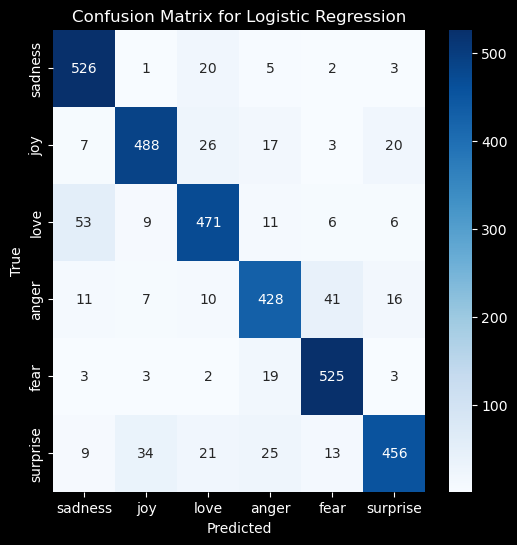

Model: Random Forest
Accuracy: 0.8809090909090909
Precision (weighted): 0.8828616165682628
Recall (weighted): 0.8809090909090909
F1-Score (weighted): 0.8800018584239648
Confusion Matrix:
[[541   0  13   1   2   0]
 [  8 501  21  15   4  12]
 [ 57  15 459  13   4   8]
 [ 11  11   5 431  40  15]
 [  6   2   1  15 531   0]
 [ 10  29  14  51  10 444]]
Classification Report:
{' surprise': {'precision': 0.8546603475513428, 'recall': 0.9712746858168761, 'f1-score': 0.9092436974789916, 'support': 557.0}, 'anger': {'precision': 0.8978494623655914, 'recall': 0.893048128342246, 'f1-score': 0.8954423592493298, 'support': 561.0}, 'fear': {'precision': 0.8947368421052632, 'recall': 0.8255395683453237, 'f1-score': 0.8587464920486436, 'support': 556.0}, 'joy': {'precision': 0.8193916349809885, 'recall': 0.8401559454191033, 'f1-score': 0.8296438883541867, 'support': 513.0}, 'love': {'precision': 0.8984771573604061, 'recall': 0.9567567567567568, 'f1-score': 0.9267015706806283, 'support': 555.0}, 'sadnes

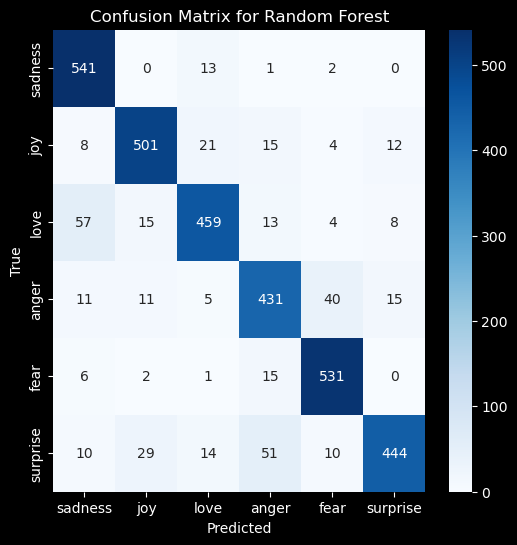

Model: Naive Bayes
Accuracy: 0.8078787878787879
Precision (weighted): 0.8185659965649225
Recall (weighted): 0.8078787878787879
F1-Score (weighted): 0.8059503353709583
Confusion Matrix:
[[497   4  39   7   4   6]
 [ 18 460  43  10  18  12]
 [ 51   8 477   6   9   5]
 [ 38  13  35 353  67   7]
 [  7  10   7  20 508   3]
 [ 35  44  55  18  35 371]]
Classification Report:
{' surprise': {'precision': 0.7693498452012384, 'recall': 0.8922800718132855, 'f1-score': 0.8262676641729011, 'support': 557.0}, 'anger': {'precision': 0.8534322820037106, 'recall': 0.8199643493761141, 'f1-score': 0.8363636363636363, 'support': 561.0}, 'fear': {'precision': 0.7271341463414634, 'recall': 0.8579136690647482, 'f1-score': 0.7871287128712872, 'support': 556.0}, 'joy': {'precision': 0.8526570048309179, 'recall': 0.6881091617933723, 'f1-score': 0.761596548004315, 'support': 513.0}, 'love': {'precision': 0.7925117004680188, 'recall': 0.9153153153153153, 'f1-score': 0.8494983277591973, 'support': 555.0}, 'sadness'

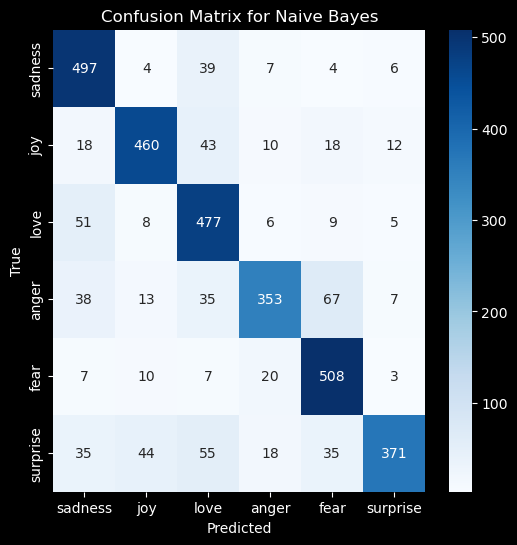

In [25]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision (weighted): {result['precision']}")
    print(f"Recall (weighted): {result['recall']}")
    print(f"F1-Score (weighted): {result['f1_score']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n" + "-"*50 + "\n")
    
    plt.figure(figsize=(6, 6))
    emotion_labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [26]:
def classify_text_svc(text):
    text_vector = vectorizer.transform([text])
    predicted_label = svc.predict(text_vector) 
    return predicted_label[0]


In [27]:
print(classify_text_svc("I can't stop smiling today!"))      
print(classify_text_svc("I really hate how this turned out"))       
print(classify_text_svc("Iam surprised ! I didn't expect that !"))     


joy
sadness
 surprise


In [28]:
import tensorflow as tf

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
max_words = 5000
max_len = 500

text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_words,
    output_mode='int',
    output_sequence_length=max_len,
    pad_to_max_tokens=True
)

text_vectorizer.adapt(x_train)



In [31]:
x_train_vec = tf.cast(text_vectorizer(x_train.to_numpy()), tf.int32)
x_val_vec = tf.cast(text_vectorizer(x_val.to_numpy()), tf.int32)
x_test_vec = tf.cast(text_vectorizer(x_test.to_numpy()), tf.int32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_val_enc = encoder.transform(y_val)
y_test_enc = encoder.transform(y_test)

In [33]:
from tensorflow.keras import layers, models
num_classes = len(encoder.classes_)

input_text = tf.keras.Input(shape=(max_len,), dtype=tf.int32)

x = layers.Embedding(max_words, 128, mask_zero=True)(input_text)
x = layers.SpatialDropout1D(0.4)(x)
x = layers.Bidirectional(layers.LSTM(64))(x)  
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.4)(x)
output = layers.Dense(num_classes, activation='softmax')(x)  
model = models.Model(inputs=input_text, outputs=output)
model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 500, 128)  │    640,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 500, 128)  │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 500)       │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     98,816 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 6)         │        390 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 747,462 (2.85 MB)

 Trainable params: 747,462 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    x_train_vec, y_train_enc,
    validation_data=(x_val_vec, y_val_enc),
    epochs=5,    
    batch_size=32
)

Epoch 1/5


219/219 ━━━━━━━━━━━━━━━━━━━━ 158s 652ms/step - accuracy: 0.2736 - loss: 1.6879 - val_accuracy: 0.7567 - val_loss: 0.8053
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 227s 766ms/step - accuracy: 0.7881 - loss: 0.6288 - val_accuracy: 0.8627 - val_loss: 0.4233
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 202s 763ms/step - accuracy: 0.9229 - loss: 0.2536 - val_accuracy: 0.8833 - val_loss: 0.3504
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 171s 780ms/step - accuracy: 0.9543 - loss: 0.1488 - val_accuracy: 0.8860 - val_loss: 0.3585
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 129s 590ms/step - accuracy: 0.9685 - loss: 0.1112 - val_accuracy: 0.8873 - val_loss: 0.3835


In [36]:
model.evaluate(x_test_vec, y_test_enc)

47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.8622 - loss: 0.4747


[0.4675101041793823, 0.8659999966621399]